<a href="https://colab.research.google.com/github/Waleed-Azam/Master_NTNU_Waleed/blob/master/2_Real_Sea_Data_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [415]:
# uploading the data set
# Estimating the data to perform regression
# Writing all stuff up
# Working on all the data set
# Task for now, can be first to estimate the best value, need to do some more improvements


In [416]:
#Prepare the nice data set
from sklearn.model_selection import train_test_split
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt


In [410]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [113]:
#4/4wFYAxkIiIcUUbdicptSHODI1k4A84cES-W4d4quPuW9N977ErMMXc4
#https://drive.google.com/file/d/1HGili9OPSFdCpIpbN7lA_i5T-s0JP-8K/view?usp=sharing
downloaded = drive.CreateFile({'id':'1HGili9OPSFdCpIpbN7lA_i5T-s0JP-8K'})

In [114]:
#Importing all the libraries
import numpy as np
import numpy as geek 
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, Dense, LSTM, multiply, concatenate, Activation, Masking, Reshape
from keras.layers import BatchNormalization, GlobalAveragePooling1D, Permute, Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import RMSprop, Adam
from keras.layers import LSTM, Activation 
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd
downloaded.GetContentFile('sea_open_data_Input_labels.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df3 = pd.read_csv('sea_open_data_Input_labels.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [115]:
df3

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.2,0.000000,0.000000,3.118769,0.620808,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.620808
4,0.3,0.000000,0.000000,1.487448,0.263957,0.00000,0.000000,0.00,0.000000,5.259879,2.000000,0.00000,0.263957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33146,3314.5,1.742342,1.181575,1.334512,2.150172,-12.51371,0.481512,0.96,5.485570,2.914854,2.608981,2.25213,1.436469
33147,3314.6,1.742342,1.181575,0.000000,2.150172,-12.51371,0.481512,0.80,5.480334,2.914854,2.608981,2.25213,1.385490
33148,3314.7,1.742342,1.181575,0.161999,2.099193,-12.51371,0.481512,0.88,5.480334,2.914854,2.608981,2.25213,1.385490
33149,3314.8,1.742342,1.181575,0.212978,2.099193,-12.51371,0.481512,0.84,5.475098,2.914854,2.608981,2.25213,1.385490


In [116]:
df3.drop(0)

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.2,0.000000,0.000000,3.118769,0.620808,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.620808
4,0.3,0.000000,0.000000,1.487448,0.263957,0.00000,0.000000,0.00,0.000000,5.259879,2.000000,0.00000,0.263957
5,0.4,0.000000,1.997236,0.000000,2.812896,-19.17845,-14.900710,0.00,0.000000,5.157921,2.000000,0.00000,2.812896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33146,3314.5,1.742342,1.181575,1.334512,2.150172,-12.51371,0.481512,0.96,5.485570,2.914854,2.608981,2.25213,1.436469
33147,3314.6,1.742342,1.181575,0.000000,2.150172,-12.51371,0.481512,0.80,5.480334,2.914854,2.608981,2.25213,1.385490
33148,3314.7,1.742342,1.181575,0.161999,2.099193,-12.51371,0.481512,0.88,5.480334,2.914854,2.608981,2.25213,1.385490
33149,3314.8,1.742342,1.181575,0.212978,2.099193,-12.51371,0.481512,0.84,5.475098,2.914854,2.608981,2.25213,1.385490


In [117]:
df3

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.2,0.000000,0.000000,3.118769,0.620808,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.620808
4,0.3,0.000000,0.000000,1.487448,0.263957,0.00000,0.000000,0.00,0.000000,5.259879,2.000000,0.00000,0.263957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33146,3314.5,1.742342,1.181575,1.334512,2.150172,-12.51371,0.481512,0.96,5.485570,2.914854,2.608981,2.25213,1.436469
33147,3314.6,1.742342,1.181575,0.000000,2.150172,-12.51371,0.481512,0.80,5.480334,2.914854,2.608981,2.25213,1.385490
33148,3314.7,1.742342,1.181575,0.161999,2.099193,-12.51371,0.481512,0.88,5.480334,2.914854,2.608981,2.25213,1.385490
33149,3314.8,1.742342,1.181575,0.212978,2.099193,-12.51371,0.481512,0.84,5.475098,2.914854,2.608981,2.25213,1.385490


In [118]:
# All plottings

In [119]:
import pandas as pd

In [120]:
df3["Time"] = df3["Time"].fillna(0)
df3["DVL1_S"] = df3["DVL1_S"].fillna(0)
df3["DVL2_S"] = df3["DVL2_S"].fillna(0)
df3["DVL3_S"] = df3["DVL3_S"].fillna(0)
df3["DVL4_S"] = df3["DVL4_S"].fillna(0)
df3["DVL1"] = df3["DVL1"].fillna(0)
df3["DVL2"] = df3["DVL2"].fillna(0)
df3["DVL3"] = df3["DVL3"].fillna(0)
df3["DVL4"] = df3["DVL4"].fillna(0)
df3["North"] = df3["North"].fillna(0)
df3["East"] = df3["East"].fillna(0)
df3["Down"] = df3["Down"].fillna(0)
df3["Heading"] = df3["Heading"].fillna(0)

In [121]:
df3

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
0,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.2,0.000000,0.000000,3.118769,0.620808,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.620808
4,0.3,0.000000,0.000000,1.487448,0.263957,0.00000,0.000000,0.00,0.000000,5.259879,2.000000,0.00000,0.263957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33146,3314.5,1.742342,1.181575,1.334512,2.150172,-12.51371,0.481512,0.96,5.485570,2.914854,2.608981,2.25213,1.436469
33147,3314.6,1.742342,1.181575,0.000000,2.150172,-12.51371,0.481512,0.80,5.480334,2.914854,2.608981,2.25213,1.385490
33148,3314.7,1.742342,1.181575,0.161999,2.099193,-12.51371,0.481512,0.88,5.480334,2.914854,2.608981,2.25213,1.385490
33149,3314.8,1.742342,1.181575,0.212978,2.099193,-12.51371,0.481512,0.84,5.475098,2.914854,2.608981,2.25213,1.385490


In [122]:
df3.drop(0)

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.2,0.000000,0.000000,3.118769,0.620808,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.620808
4,0.3,0.000000,0.000000,1.487448,0.263957,0.00000,0.000000,0.00,0.000000,5.259879,2.000000,0.00000,0.263957
5,0.4,0.000000,1.997236,0.000000,2.812896,-19.17845,-14.900710,0.00,0.000000,5.157921,2.000000,0.00000,2.812896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33146,3314.5,1.742342,1.181575,1.334512,2.150172,-12.51371,0.481512,0.96,5.485570,2.914854,2.608981,2.25213,1.436469
33147,3314.6,1.742342,1.181575,0.000000,2.150172,-12.51371,0.481512,0.80,5.480334,2.914854,2.608981,2.25213,1.385490
33148,3314.7,1.742342,1.181575,0.161999,2.099193,-12.51371,0.481512,0.88,5.480334,2.914854,2.608981,2.25213,1.385490
33149,3314.8,1.742342,1.181575,0.212978,2.099193,-12.51371,0.481512,0.84,5.475098,2.914854,2.608981,2.25213,1.385490


In [123]:
df3=df3.drop(0)

In [124]:
df3

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.2,0.000000,0.000000,3.118769,0.620808,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.620808
4,0.3,0.000000,0.000000,1.487448,0.263957,0.00000,0.000000,0.00,0.000000,5.259879,2.000000,0.00000,0.263957
5,0.4,0.000000,1.997236,0.000000,2.812896,-19.17845,-14.900710,0.00,0.000000,5.157921,2.000000,0.00000,2.812896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33146,3314.5,1.742342,1.181575,1.334512,2.150172,-12.51371,0.481512,0.96,5.485570,2.914854,2.608981,2.25213,1.436469
33147,3314.6,1.742342,1.181575,0.000000,2.150172,-12.51371,0.481512,0.80,5.480334,2.914854,2.608981,2.25213,1.385490
33148,3314.7,1.742342,1.181575,0.161999,2.099193,-12.51371,0.481512,0.88,5.480334,2.914854,2.608981,2.25213,1.385490
33149,3314.8,1.742342,1.181575,0.212978,2.099193,-12.51371,0.481512,0.84,5.475098,2.914854,2.608981,2.25213,1.385490


In [125]:
# Working on the Deep Learning project.

In [126]:
t=df3['Time']
Tdata=df3['DVL1_S']
X1=np.array(Tdata)
Tdata2=df3['DVL2_S']
X2=np.array(Tdata2)
Tdata3=df3['DVL3_S']
X3=np.array(Tdata)
Tdata4=df3['DVL4_S']
X4=np.array(Tdata4)
Tdata5=df3['North']
X5=np.array(Tdata5)
Tdata6=df3['East']
X6=np.array(Tdata6)
Tdata7=df3['Down']
X7=np.array(Tdata7)
Tdata8=df3['Heading']
X8=np.array(Tdata8)

In [127]:
# Stacking the two arrays along axis 0 
out_arr1_X_training = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_arr1_X_training) 
print ("Output Shape:\n ", out_arr1_X_training.shape) 

Output stacked array along axis 0:
  [[0.        0.        0.        ... 1.742342  1.742342  1.742342 ]
 [0.        0.        0.        ... 1.181575  1.181575  1.181575 ]
 [0.        0.        0.        ... 1.742342  1.742342  1.742342 ]
 ...
 [0.        0.        0.        ... 0.4815118 0.4815118 0.4815118]
 [0.        0.        0.        ... 0.88      0.84      0.88     ]
 [0.        0.        0.        ... 5.480334  5.475098  5.469862 ]]
Output Shape:
  (8, 33150)


In [128]:
X= out_arr1_X_training
X = X.transpose((1,0))
X.shape

(33150, 8)

In [129]:
Tdata1=df3['DVL1']
y1=np.array(Tdata1)
Tdata22=df3['DVL2']
y2=np.array(Tdata22)
Tdata33=df3['DVL3']
y3=np.array(Tdata33)
Tdata44=df3['DVL4']
y4=np.array(Tdata44)

In [130]:
# Stacking the two arrays along axis 0 
out_lab1_Target = geek.stack((y1, y2, y3, y4), axis = 0) 
print ("Output stacked array along axis 0:\n ", out_lab1_Target) 
print ("Labels Shape :\n ", out_lab1_Target.shape) 

Output stacked array along axis 0:
  [[0.        0.        0.        ... 2.914854  2.914854  2.914854 ]
 [0.        0.        0.        ... 2.608981  2.608981  2.608981 ]
 [0.        0.        0.        ... 2.25213   2.25213   2.25213  ]
 [0.        0.        0.6208084 ... 1.38549   1.38549   1.38549  ]]
Labels Shape :
  (4, 33150)


In [131]:
y= out_lab1_Target

In [132]:
y=y.transpose((1,0))

In [133]:
# mlp for multi-output regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense

In [134]:
X.shape

(33150, 8)

In [135]:
y.shape

(33150, 4)

In [136]:
Xt=X[:23150]


In [137]:
yr=y[:23150]

In [138]:
yr.shape

(23150, 4)

In [139]:
Xt.shape

(23150, 8)

In [140]:
Xr=Xt.reshape(23150,1,8)

In [141]:
yt=yr.reshape(23150,1,4)

In [142]:
xc=X[-10000:]

In [143]:
yc=y[-10000:]

In [144]:
xcc=xc.reshape(10000,1,8)

In [145]:
ycc=yc.reshape(10000,1,4)

In [146]:
import tensorflow as tf
import keras

In [147]:
n_steps=1

In [148]:
n_features=4

In [149]:
ycc.shape

(10000, 1, 4)

In [151]:
from keras import regularizers 

In [265]:
values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]

from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, Flatten, Reshape, Dropout
from keras.models import Model
from keras import backend as K
input_img=Input(shape=(n_steps, 8))
#input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format
# Dropout 
x = Conv1D(128, 3, activation='relu', padding='same')(input_img)
x= Dropout(0.8)(x)
#x= MaxPooling1D(2, padding= 'same')(x)
#x= Dropout(0.3)(x)
#x= MaxPooling1D(2, padding= 'same')(x)
x = Conv1D(256, 3, activation='relu', padding='same')(x)
#x= Dropout(0.3)(x)
x= Dropout(0.8)(x)
#x= MaxPooling1D(2, padding= 'same')(x)
#x= MaxPooling1D(2, padding= 'same')(x) 
#x= Dropout(0.3)(x)
#x = Conv1D(256, 3, activation='relu', padding='same')(x)
#x= Dropout(0.8)(x)
#x= MaxPooling1D(2, padding= 'same')(x) 
#x= Dropout(0.8)(x)
#x = Conv1D(1, 1, activation='relu', padding='same')(x)
#x= MaxPooling1D(2, padding= 'same')(x) 
#x= Dropout(0.8)(x)
#x= UpSampling1D(2)(x)
#x= Dropout(0.3)(x)
#x= Dropout(0.8)(x)
#x= Dropout(0.8)(x)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
x= Flatten()(x)
decoded = Dense(n_features*n_steps, activation='linear')(x)
outputs= Reshape((n_steps, n_features))(decoded)
#tf.reshape(tensor, shape, name=None)
autoencoder = Model(input_img, outputs)
opt = keras.optimizers.Adam(learning_rate=0.000001)
autoencoder.compile(opt, loss='mse')

In [266]:
from keras.callbacks import TensorBoard, EarlyStopping

es =EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=4,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
history=autoencoder.fit(Xr, yt,
                epochs=5000,
                batch_size=32,
                shuffle=True,
                validation_data=(xcc, ycc), 
                callbacks= [es], verbose=1)

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#Early Stopping.. Can be a wise option to observe
#tf.keras.callbacks.EarlyStopping(
   # monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto',
  #  baseline=None, restore_best_weights=False
#)

Epoch 1/5000
724/724 [==============================] - 2s 3ms/step - loss: 6.5506 - val_loss: 3.2512
Epoch 2/5000
724/724 [==============================] - 2s 3ms/step - loss: 6.1367 - val_loss: 3.0378
Epoch 3/5000
724/724 [==============================] - 2s 3ms/step - loss: 5.7594 - val_loss: 2.8491
Epoch 4/5000
724/724 [==============================] - 2s 3ms/step - loss: 5.4292 - val_loss: 2.6838
Epoch 5/5000
724/724 [==============================] - 2s 3ms/step - loss: 5.0704 - val_loss: 2.5403
Epoch 6/5000
724/724 [==============================] - 2s 3ms/step - loss: 4.7984 - val_loss: 2.4098
Epoch 7/5000
724/724 [==============================] - 2s 3ms/step - loss: 4.5463 - val_loss: 2.2993
Epoch 8/5000
724/724 [==============================] - 2s 3ms/step - loss: 4.4066 - val_loss: 2.2014
Epoch 9/5000
724/724 [==============================] - 2s 3ms/step - loss: 4.1871 - val_loss: 2.1171
Epoch 10/5000
724/724 [==============================] - 2s 3ms/step - loss: 4.029

dict_keys(['loss', 'val_loss'])


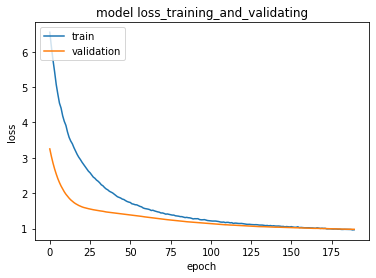

In [267]:
 # list all data in history
print(history.history.keys())
# summarize history for accuracy
# History for Dropout 1st layer every layer after the maxpooling, 1e-3 in the first 2 layers and in the third layer, the regularization rate is 1e-01
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss_training_and_validating')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [268]:
Xg=X.reshape(33150,1,8)

In [269]:
o=autoencoder.predict(Xg)

In [270]:
Xfg=Xg.reshape((Xg.shape[0]*Xg.shape[1]),Xg.shape[2])

In [271]:
Xfg.shape

(33150, 8)

In [272]:
Xfg1=Xfg[:,0]
Xfg2=Xfg[:,1]
Xfg3=Xfg[:,2]
Xfg4=Xfg[:,3]

In [273]:
oo=o.reshape((o.shape[0]*o.shape[1]),o.shape[2])

In [274]:
oo.shape

(33150, 4)

In [275]:
o1=oo[:,0]
o2=oo[:,1]
o3=oo[:,2]
o4=oo[:,3]

In [276]:
t.shape

(33150,)

In [277]:
t.dtype

dtype('float64')

In [ ]:
fax = plt.gca()
plt.plot(t,Xfg1, color='yellow', label='Orignal DVL1 Data')

plt.plot(t,o1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

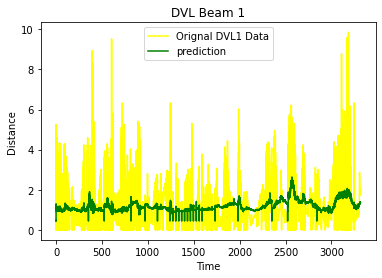

In [278]:
fax = plt.gca()
plt.plot(t,Xfg1, color='yellow', label='Orignal DVL1 Data')

plt.plot(t,o1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

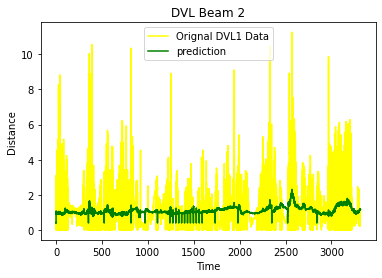

In [279]:
fax = plt.gca()
plt.plot(t,Xfg2, color='yellow', label='Orignal DVL2 Data')
plt.plot(t,o2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

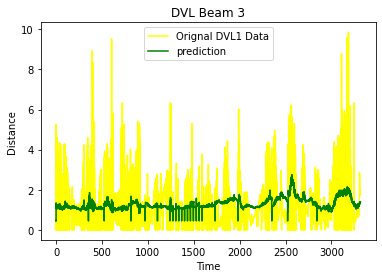

In [280]:
fax = plt.gca()
plt.plot(t,Xfg3, color='yellow', label='Orignal DVL3 Data')
plt.plot(t,o3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

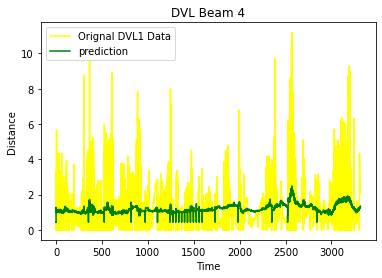

In [281]:
fax = plt.gca()
plt.plot(t,Xfg4, color='yellow', label='Orignal DVL4 Data')
plt.plot(t,o4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [282]:
# Apply Kalman filters data sets to get more results

In [283]:
#Data set one_

In [290]:
#https://drive.google.com/file/d/1rAoEKu_JKZi34tEG24Sv_10Is0w7TW13/view?usp=sharing
downloaded_1 = drive.CreateFile({'id':'1rAoEKu_JKZi34tEG24Sv_10Is0w7TW13'})

In [291]:
downloaded_1.GetContentFile('test1_testing.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df1 = pd.read_csv('test1_testing.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [292]:
df1

,DVL1S,DVL2S,DVL3S,DVL4S,DVL1,DVL2,DVL3,DVL4
0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,0.00000,0.000000,0.000000,0.000000,0.304071,-13.193710,0.00,0.000000
...,...,...,...,...,...,...,...,...
10746,2.25213,2.761918,2.048215,1.742342,-4.490873,-0.055293,6.24,0.274017
10747,2.25213,2.812896,2.048215,1.742342,-4.490873,-0.055293,6.12,0.307178
10748,2.25213,2.812896,2.048215,1.742342,-4.490873,-0.055293,6.16,0.289725
10749,2.25213,2.812896,2.048215,1.742342,-4.490873,-0.055293,6.16,0.289725


In [293]:

Tdata=df1['DVL1S']
X1=np.array(Tdata)
Tdata2=df1['DVL2S']
X2=np.array(Tdata2)
Tdata3=df1['DVL3S']
X3=np.array(Tdata)
Tdata4=df1['DVL4S']
X4=np.array(Tdata4)
Tdata5=df1['DVL1']
X5=np.array(Tdata5)
Tdata6=df1['DVL2']
X6=np.array(Tdata6)
Tdata7=df1['DVL3']
X7=np.array(Tdata7)
Tdata8=df1['DVL4']
X8=np.array(Tdata8)

In [294]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[ 0.          0.          0.         ...  2.25213     2.25213
   2.25213   ]
 [ 0.          0.          0.         ...  2.812896    2.812896
   2.812896  ]
 [ 0.          0.          0.         ...  2.25213     2.25213
   2.25213   ]
 ...
 [ 0.          0.          0.         ... -0.05529253 -0.05529253
  -0.05529253]
 [ 0.          0.          0.         ...  6.16        6.16
   6.16      ]
 [ 0.          0.          0.         ...  0.2897247   0.2897247
   0.2897247 ]]
Output Shape:
  (8, 10751)


In [295]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(10751, 8)

In [296]:
Xzz=Xzz.reshape(10751,1,8)

In [297]:
test1= autoencoder.predict(Xzz)

In [298]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])

In [299]:
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]

In [300]:
Xzzf3=Xzzf[:,2]

In [301]:
Xzzf4=Xzzf[:,3]

In [302]:
test1g=test1.reshape((test1.shape[0]*test1.shape[1]),test1.shape[2])

In [303]:
t1=test1g[:,0]
t2=test1g[:,1]
t3=test1g[:,2]
t4=test1g[:,3]

In [304]:
t_tes=t[:10751]

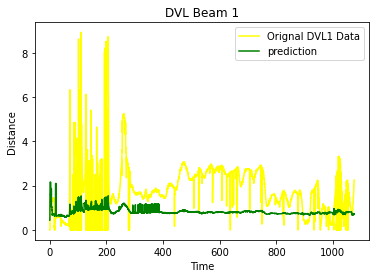

In [305]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

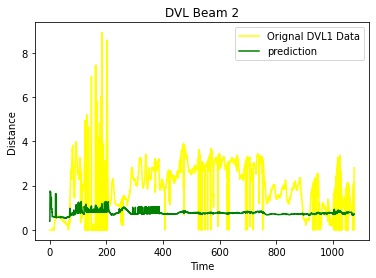

In [306]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL2 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

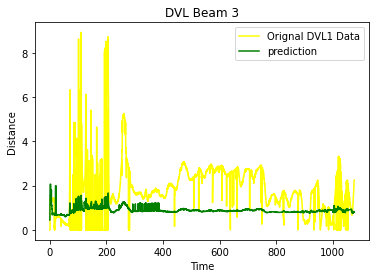

In [307]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL3 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

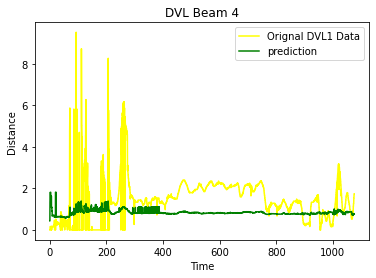

In [308]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL4 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [309]:
#New data set

In [310]:
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
downloaded_9 = drive.CreateFile({'id':'1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL'})
downloaded_9.GetContentFile('test2_testing.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df6 = pd.read_csv('test2_testing.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [311]:
df6

,DVL1S,DVL2S,DVL3S,DVL4S,DVL1,DVL2,DVL3,DVL4
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...
14443,1.640384,2.099193,7.144184,4.597155,-11.46038,-7.813345,3.28,4.309218
14444,1.640384,2.099193,7.144184,4.597155,-11.46038,-7.813345,3.28,4.181809
14445,3.322685,0.000000,0.000000,4.546175,-11.46038,-7.813345,3.28,4.194026
14446,4.699112,0.000000,6.279455,4.495197,-11.46038,-7.813345,3.24,4.246386


In [312]:

Tdata=df6['DVL1S']
X1=np.array(Tdata)
Tdata2=df6['DVL2S']
X2=np.array(Tdata2)
Tdata3=df6['DVL3S']
X3=np.array(Tdata)
Tdata4=df6['DVL4S']
X4=np.array(Tdata4)
Tdata5=df6['DVL1']
X5=np.array(Tdata5)
Tdata6=df6['DVL2']
X6=np.array(Tdata6)
Tdata7=df6['DVL3']
X7=np.array(Tdata7)
Tdata8=df6['DVL4']
X8=np.array(Tdata8)

In [313]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[ 0.        0.        0.       ...  3.322685  4.699112  4.699112]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  3.322685  4.699112  4.699112]
 ...
 [ 0.        0.        0.       ... -7.813345 -7.813345 -7.72948 ]
 [ 0.        0.        0.       ...  3.28      3.24      3.24    ]
 [ 0.        0.        0.       ...  4.194026  4.246386  4.246386]]
Output Shape:
  (8, 14448)


In [314]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(14448, 8)

In [315]:
Xzz=Xzz.reshape(14448,1,8)

In [316]:
test2= autoencoder.predict(Xzz)

In [317]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]
Xzzf3=Xzzf[:,2]
Xzzf4=Xzzf[:,2]
test2g=test2.reshape((test2.shape[0]*test2.shape[1]),test2.shape[2])
t1=test2g[:,0]
t2=test2g[:,1]
t3=test2g[:,2]
t4=test2g[:,3]
t_tes=t[:14448]

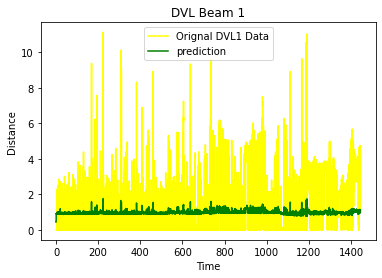

In [318]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

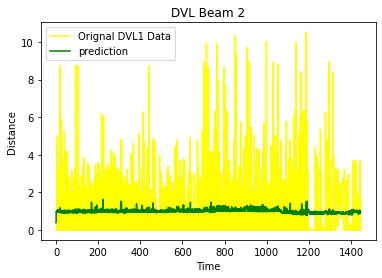

In [319]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

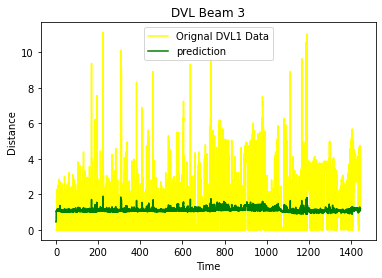

In [320]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

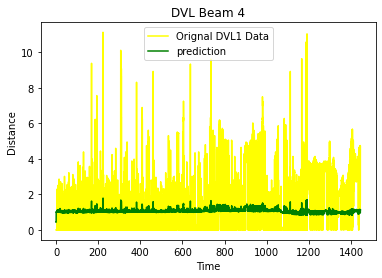

In [321]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [322]:
#https://drive.google.com/file/d/1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
downloaded_8 = drive.CreateFile({'id':'1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk'})
downloaded_8.GetContentFile('test3_testing.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df8 = pd.read_csv('test3_testing.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [323]:
df8

,DVL1S,DVL2S,DVL3S,DVL4S,DVL1,DVL2,DVL3,DVL4
0,0.0,0.000000,0.0,0.0,0.00000,0.00000,0.00,0.000000
1,0.0,0.000000,0.0,0.0,0.00000,0.00000,0.00,0.000000
2,0.0,0.000000,0.0,0.0,0.00000,0.00000,0.00,0.000000
3,0.0,0.000000,0.0,0.0,0.00000,0.00000,0.00,0.000000
4,0.0,0.000000,0.0,0.0,0.00000,0.00000,0.00,0.000000
...,...,...,...,...,...,...,...,...
30418,0.0,4.036387,0.0,0.0,-17.45851,-11.95944,11.64,4.173082
30419,0.0,4.036387,0.0,0.0,-17.45851,-11.95944,11.64,4.173082
30420,0.0,4.036387,0.0,0.0,-17.45851,-11.95944,11.64,4.173082
30421,0.0,1.997236,0.0,0.0,-17.45851,-11.95944,11.64,4.173082


In [324]:

Tdata=df8['DVL1S']
X1=np.array(Tdata)
Tdata2=df8['DVL2S']
X2=np.array(Tdata2)
Tdata3=df8['DVL3S']
X3=np.array(Tdata)
Tdata4=df8['DVL4S']
X4=np.array(Tdata4)
Tdata5=df8['DVL1']
X5=np.array(Tdata5)
Tdata6=df8['DVL2']
X6=np.array(Tdata6)
Tdata7=df8['DVL3']
X7=np.array(Tdata7)
Tdata8=df8['DVL4']
X8=np.array(Tdata8)

In [325]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[  0.         0.         0.       ...   0.         0.         0.      ]
 [  0.         0.         0.       ...   4.036387   1.997236   1.997236]
 [  0.         0.         0.       ...   0.         0.         0.      ]
 ...
 [  0.         0.         0.       ... -11.95944  -11.95944  -11.95944 ]
 [  0.         0.         0.       ...  11.64      11.64      11.64    ]
 [  0.         0.         0.       ...   4.173082   4.173082   4.173082]]
Output Shape:
  (8, 30423)


In [326]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(30423, 8)

In [327]:
Xzz=Xzz.reshape(30423,1,8)

In [328]:
test3= autoencoder.predict(Xzz)

In [329]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]
Xzzf3=Xzzf[:,2]
Xzzf4=Xzzf[:,2]
test3g=test3.reshape((test3.shape[0]*test3.shape[1]),test3.shape[2])
t1=test3g[:,0]
t2=test3g[:,1]
t3=test3g[:,2]
t4=test3g[:,3]
t_tes=t[:30423]

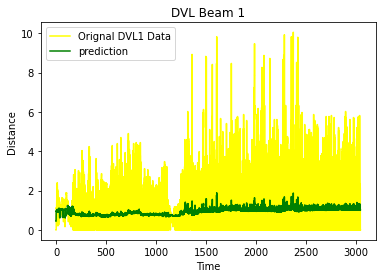

In [330]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

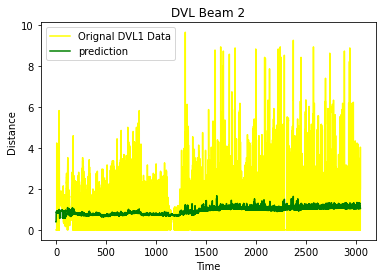

In [331]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

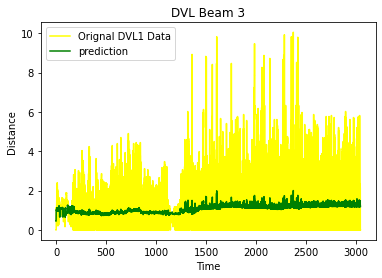

In [332]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

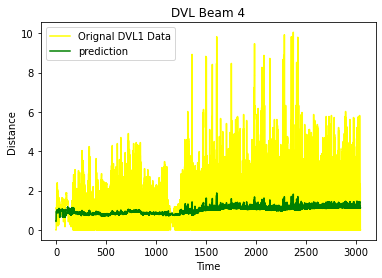

In [333]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [334]:
#https://drive.google.com/file/d/1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/19C5BWCndzY_W7mY2w1y1zAqjQLcyHwi4/view?usp=sharing
downloaded_10 = drive.CreateFile({'id':'19C5BWCndzY_W7mY2w1y1zAqjQLcyHwi4'})
downloaded_10.GetContentFile('test4_testing.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df10 = pd.read_csv('test4_testing.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [335]:
df10

,DVL1S,DVL2S,DVL3S,DVL4S,DVL1,DVL2,DVL3,DVL4
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...
15802,1.385490,2.252130,3.169748,1.997236,-8.357908,0.277937,0.36,6.281440
15803,1.385490,2.252130,3.169748,1.997236,-8.234419,0.340757,0.36,6.281440
15804,1.385490,2.252130,3.169748,1.997236,-8.234419,0.340757,0.36,6.281440
15805,1.436469,2.354087,3.271706,1.997236,-8.234419,0.340757,0.36,6.195919


In [336]:

Tdata=df10['DVL1S']
X1=np.array(Tdata)
Tdata2=df10['DVL2S']
X2=np.array(Tdata2)
Tdata3=df10['DVL3S']
X3=np.array(Tdata)
Tdata4=df10['DVL4S']
X4=np.array(Tdata4)
Tdata5=df10['DVL1']
X5=np.array(Tdata5)
Tdata6=df10['DVL2']
X6=np.array(Tdata6)
Tdata7=df10['DVL3']
X7=np.array(Tdata7)
Tdata8=df10['DVL4']
X8=np.array(Tdata8)

In [337]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[0.        0.        0.        ... 1.38549   1.436469  1.436469 ]
 [0.        0.        0.        ... 2.25213   2.354087  2.405066 ]
 [0.        0.        0.        ... 1.38549   1.436469  1.436469 ]
 ...
 [0.        0.        0.        ... 0.3407575 0.3407575 0.3407575]
 [0.        0.        0.        ... 0.36      0.36      0.44     ]
 [0.        0.        0.        ... 6.28144   6.195919  6.174975 ]]
Output Shape:
  (8, 15807)


In [338]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(15807, 8)

In [339]:
Xzz=Xzz.reshape(15807,1,8)

In [340]:
test4= autoencoder.predict(Xzz)

In [341]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]
Xzzf3=Xzzf[:,2]
Xzzf4=Xzzf[:,2]
test4g=test4.reshape((test4.shape[0]*test4.shape[1]),test4.shape[2])
t1=test4g[:,0]
t2=test4g[:,1]
t3=test4g[:,2]
t4=test4g[:,3]
t_tes=t[:15807]

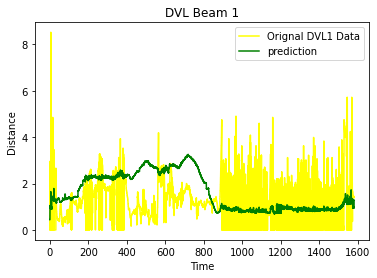

In [342]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

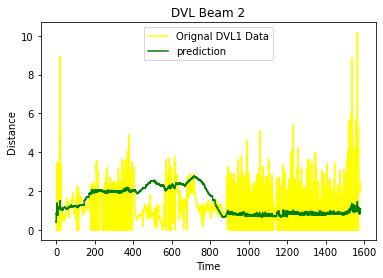

In [343]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

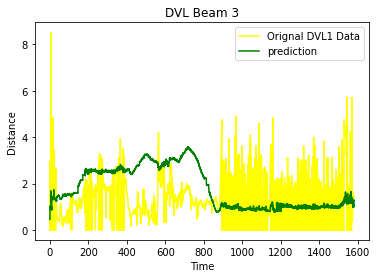

In [344]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

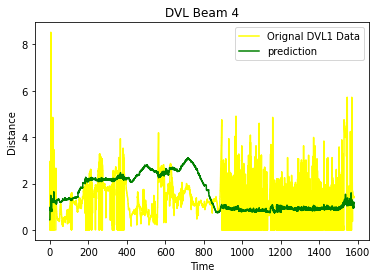

In [345]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [346]:
# Kalman Filter predicition form the trails for which data is made Test1

In [347]:
#https://drive.google.com/file/d/1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/19C5BWCndzY_W7mY2w1y1zAqjQLcyHwi4/view?usp=sharing
#https://drive.google.com/file/d/1u6do9VzYpdRrGQkoChgtnWv1KfuCRYED/view?usp=sharing
downloaded_11 = drive.CreateFile({'id':'1u6do9VzYpdRrGQkoChgtnWv1KfuCRYED'})
downloaded_11.GetContentFile('T1.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df11 = pd.read_csv('T1.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [348]:
df11

,DVL1S,DVL2S,DVL3S,DVL4S,DVL1,DVL2,DVL3,DVL4
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,3.118769,0.620808,0.000000,0.000000,3.118769,0.620808
4,0.000000,0.000000,1.487448,0.263957,0.000000,0.000000,1.487448,0.263957
...,...,...,...,...,...,...,...,...
3517,3.628557,3.271706,4.546175,4.291282,3.628557,3.271706,4.546175,4.291282
3518,3.577578,4.189324,4.546175,4.240303,3.577578,4.189324,4.546175,4.240303
3519,3.628557,3.271706,4.495197,4.240303,3.628557,3.271706,4.495197,4.240303
3520,3.628557,3.271706,4.495197,4.240303,3.628557,3.271706,4.495197,4.240303


In [349]:

Tdata=df11['DVL1S']
X1=np.array(Tdata)
Tdata2=df11['DVL2S']
X2=np.array(Tdata2)
Tdata3=df11['DVL3S']
X3=np.array(Tdata)
Tdata4=df11['DVL4S']
X4=np.array(Tdata4)
Tdata5=df11['DVL1']
X5=np.array(Tdata5)
Tdata6=df11['DVL2']
X6=np.array(Tdata6)
Tdata7=df11['DVL3']
X7=np.array(Tdata7)
Tdata8=df11['DVL4']
X8=np.array(Tdata8)

In [350]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[0.       0.       0.       ... 3.628557 3.628557 3.628557]
 [0.       0.       0.       ... 3.271706 3.271706 3.271706]
 [0.       0.       0.       ... 3.628557 3.628557 3.628557]
 ...
 [0.       0.       0.       ... 3.271706 3.271706 3.271706]
 [0.       0.       0.       ... 4.495197 4.495197 4.495197]
 [0.       0.       0.       ... 4.240303 4.240303 4.240303]]
Output Shape:
  (8, 3522)


In [351]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(3522, 8)

In [352]:
Xzz=Xzz.reshape(3522,1,8)

In [353]:
test4= autoencoder.predict(Xzz)

In [354]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]
Xzzf3=Xzzf[:,2]
Xzzf4=Xzzf[:,2]
test4g=test4.reshape((test4.shape[0]*test4.shape[1]),test4.shape[2])
t1=test4g[:,0]
t2=test4g[:,1]
t3=test4g[:,2]
t4=test4g[:,3]
t_tes=t[:3522]

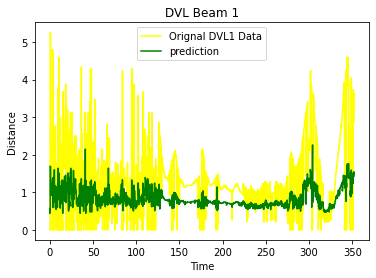

In [355]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

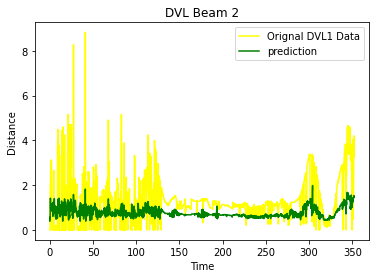

In [356]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

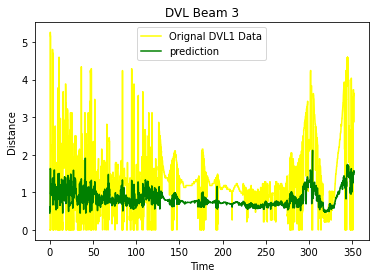

In [357]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

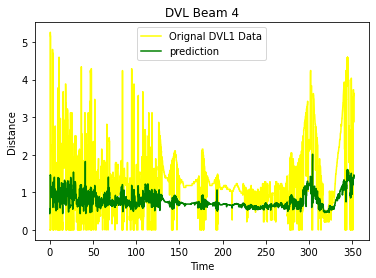

In [358]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [359]:
#
#
#https://drive.google.com/file/d/1b1ywVL0jI15evpUIu2j9FPBhw8_cx-za/view?usp=sharing
#https://drive.google.com/file/d/1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/19C5BWCndzY_W7mY2w1y1zAqjQLcyHwi4/view?usp=sharing
#https://drive.google.com/file/d/1u6do9VzYpdRrGQkoChgtnWv1KfuCRYED/view?usp=sharing
downloaded_12 = drive.CreateFile({'id':'1b1ywVL0jI15evpUIu2j9FPBhw8_cx-za'})
downloaded_12.GetContentFile('T2.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df12 = pd.read_csv('T2.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [360]:

Tdata=df12['DVL1S']
X1=np.array(Tdata)
Tdata2=df12['DVL2S']
X2=np.array(Tdata2)
Tdata3=df12['DVL3S']
X3=np.array(Tdata)
Tdata4=df12['DVL4S']
X4=np.array(Tdata4)
Tdata5=df12['DVL1']
X5=np.array(Tdata5)
Tdata6=df12['DVL2']
X6=np.array(Tdata6)
Tdata7=df12['DVL3']
X7=np.array(Tdata7)
Tdata8=df12['DVL4']
X8=np.array(Tdata8)

In [361]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[  0.          0.          0.        ...   1.130596    0.8757023
    1.130596 ]
 [  0.          0.          0.        ...   0.6717872   1.079618
    0.6717872]
 [  0.          0.          0.        ...   1.130596    0.8757023
    1.130596 ]
 ...
 [  0.          0.          0.        ... -10.65426   -10.65426
  -10.65426  ]
 [  0.          0.          0.        ...   3.28        3.28
    3.28     ]
 [  0.          0.          0.        ...   4.579744    4.548328
    4.537856 ]]
Output Shape:
  (8, 1725)


In [362]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(1725, 8)

In [363]:
Xzz=Xzz.reshape(1725,1,8)

In [364]:
test4= autoencoder.predict(Xzz)

In [365]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]
Xzzf3=Xzzf[:,2]
Xzzf4=Xzzf[:,2]
test4g=test4.reshape((test4.shape[0]*test4.shape[1]),test4.shape[2])
t1=test4g[:,0]
t2=test4g[:,1]
t3=test4g[:,2]
t4=test4g[:,3]
t_tes=t[:1725]

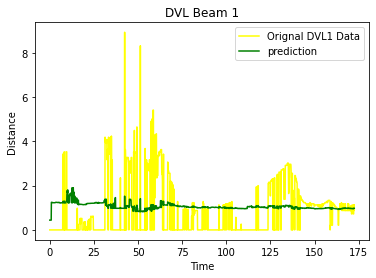

In [366]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

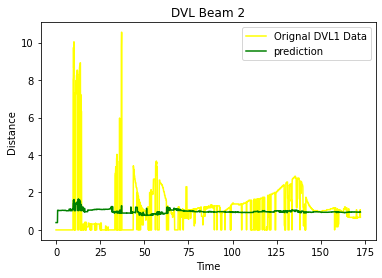

In [367]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

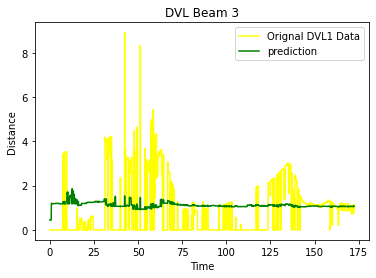

In [368]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

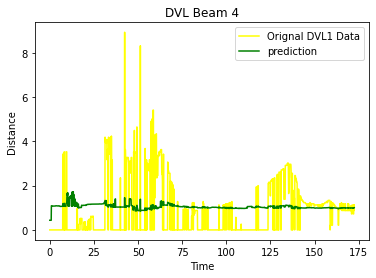

In [369]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [370]:
#test3
#https://drive.google.com/file/d/1i-DsoZEH_vIN9Lu2dTGgMvoqXPtEu5RM/view?usp=sharing
#
#
#https://drive.google.com/file/d/1b1ywVL0jI15evpUIu2j9FPBhw8_cx-za/view?usp=sharing
#https://drive.google.com/file/d/1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/19C5BWCndzY_W7mY2w1y1zAqjQLcyHwi4/view?usp=sharing
#https://drive.google.com/file/d/1u6do9VzYpdRrGQkoChgtnWv1KfuCRYED/view?usp=sharing
downloaded_13 = drive.CreateFile({'id':'1i-DsoZEH_vIN9Lu2dTGgMvoqXPtEu5RM'})
downloaded_13.GetContentFile('T3.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df13 = pd.read_csv('T3.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [371]:

Tdata=df13['DVL1S']
X1=np.array(Tdata)
Tdata2=df13['DVL2S']
X2=np.array(Tdata2)
Tdata3=df13['DVL3S']
X3=np.array(Tdata)
Tdata4=df13['DVL4S']
X4=np.array(Tdata4)
Tdata5=df13['DVL1']
X5=np.array(Tdata5)
Tdata6=df13['DVL2']
X6=np.array(Tdata6)
Tdata7=df13['DVL3']
X7=np.array(Tdata7)
Tdata8=df13['DVL4']
X8=np.array(Tdata8)

In [372]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[ 0.        0.        0.       ...  1.079618  1.079618  1.181575]
 [ 0.        0.        0.       ...  2.761918  2.25213   2.761918]
 [ 0.        0.        0.       ...  1.079618  1.079618  1.181575]
 ...
 [ 0.        0.        0.       ... -3.768226 -3.768226 -3.768226]
 [ 0.        0.        0.       ...  2.44      2.36      2.36    ]
 [ 0.        0.        0.       ...  4.918338  4.914847  4.914847]]
Output Shape:
  (8, 2915)


In [373]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(2915, 8)

In [374]:
Xzz=Xzz.reshape(2915,1,8)

In [375]:
test4= autoencoder.predict(Xzz)

In [376]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]
Xzzf3=Xzzf[:,2]
Xzzf4=Xzzf[:,2]
test4g=test4.reshape((test4.shape[0]*test4.shape[1]),test4.shape[2])
t1=test4g[:,0]
t2=test4g[:,1]
t3=test4g[:,2]
t4=test4g[:,3]
t_tes=t[:2915]

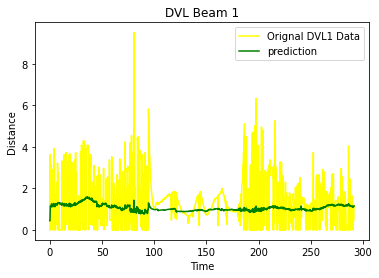

In [377]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

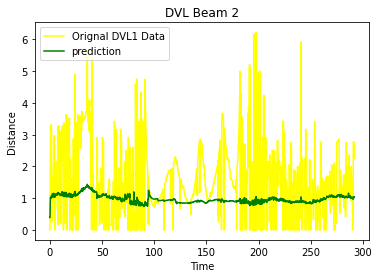

In [378]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

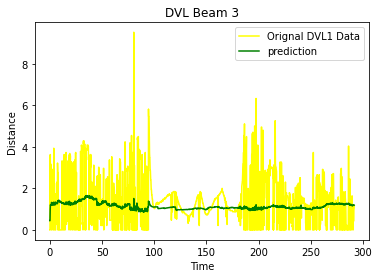

In [379]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

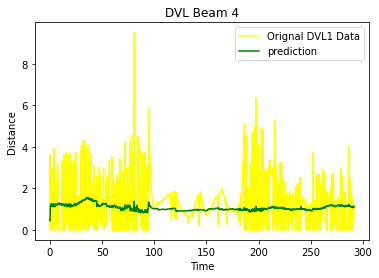

In [380]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [381]:
# test4 Kalman FIlters

In [382]:
#https://drive.google.com/file/d/1AwsQ8sIzcuTXalR_A9q11k_EElRGQV2-/view?usp=sharing

#test3
#https://drive.google.com/file/d/1i-DsoZEH_vIN9Lu2dTGgMvoqXPtEu5RM/view?usp=sharing
#
#
#https://drive.google.com/file/d/1b1ywVL0jI15evpUIu2j9FPBhw8_cx-za/view?usp=sharing
#https://drive.google.com/file/d/1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/19C5BWCndzY_W7mY2w1y1zAqjQLcyHwi4/view?usp=sharing
#https://drive.google.com/file/d/1u6do9VzYpdRrGQkoChgtnWv1KfuCRYED/view?usp=sharing
downloaded_14 = drive.CreateFile({'id':'1AwsQ8sIzcuTXalR_A9q11k_EElRGQV2-'})
downloaded_14.GetContentFile('T4.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df14 = pd.read_csv('T4.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [383]:
df14

,DVL1S,DVL2S,DVL3S,DVL4S,DVL1,DVL2,DVL3,DVL4
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000
...,...,...,...,...,...,...,...,...
1526,0.875702,0.365914,0.365914,0.824724,-12.60941,-7.633606,1.96,5.880014
1527,0.875702,0.365914,0.416893,0.824724,-12.60941,-7.633606,1.84,5.874778
1528,0.875702,0.365914,0.416893,0.824724,-12.63039,-7.666357,1.92,5.881760
1529,0.518851,0.365914,0.416893,0.824724,-12.63039,-7.666357,1.88,5.876524


In [384]:

Tdata=df14['DVL1S']
X1=np.array(Tdata)
Tdata2=df14['DVL2S']
X2=np.array(Tdata2)
Tdata3=df14['DVL3S']
X3=np.array(Tdata)
Tdata4=df14['DVL4S']
X4=np.array(Tdata4)
Tdata5=df14['DVL1']
X5=np.array(Tdata5)
Tdata6=df14['DVL2']
X6=np.array(Tdata6)
Tdata7=df14['DVL3']
X7=np.array(Tdata7)
Tdata8=df14['DVL4']
X8=np.array(Tdata8)

In [385]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[ 0.         0.         0.        ...  0.8757023  0.5188508  0.3149356]
 [ 0.         0.         0.        ...  0.3659144  0.3659144  0.3659144]
 [ 0.         0.         0.        ...  0.8757023  0.5188508  0.3149356]
 ...
 [ 0.         0.         0.        ... -7.666357  -7.666357  -7.666357 ]
 [ 0.         0.         0.        ...  1.92       1.88       1.88     ]
 [ 0.         0.         0.        ...  5.88176    5.876524   5.869542 ]]
Output Shape:
  (8, 1531)


In [386]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(1531, 8)

In [387]:
Xzz=Xzz.reshape(1531,1,8)

In [388]:
test4= autoencoder.predict(Xzz)

In [389]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]
Xzzf3=Xzzf[:,2]
Xzzf4=Xzzf[:,2]
test4g=test4.reshape((test4.shape[0]*test4.shape[1]),test4.shape[2])
t1=test4g[:,0]
t2=test4g[:,1]
t3=test4g[:,2]
t4=test4g[:,3]
t_tes=t[:1531]

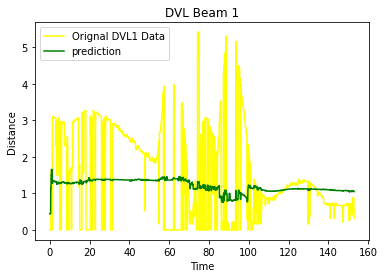

In [390]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

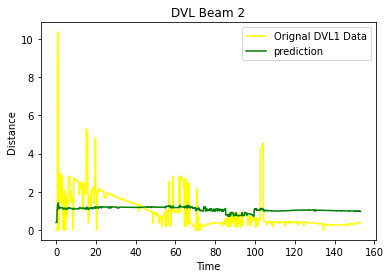

In [391]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

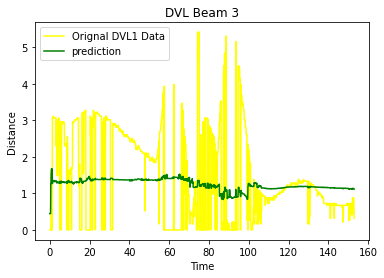

In [392]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

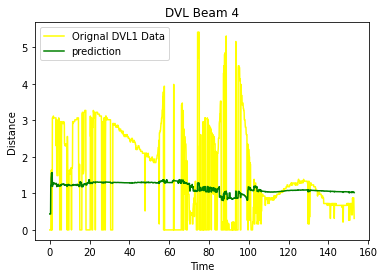

In [393]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [394]:
#TEST 5

In [395]:
#https://drive.google.com/file/d/155Z2jFNWeMlGmOrK_vfV6CKM8fNEVC7S/view?usp=sharing
#https://drive.google.com/file/d/1AwsQ8sIzcuTXalR_A9q11k_EElRGQV2-/view?usp=sharing

#test3
#https://drive.google.com/file/d/1i-DsoZEH_vIN9Lu2dTGgMvoqXPtEu5RM/view?usp=sharing
#
#
#https://drive.google.com/file/d/1b1ywVL0jI15evpUIu2j9FPBhw8_cx-za/view?usp=sharing
#https://drive.google.com/file/d/1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/19C5BWCndzY_W7mY2w1y1zAqjQLcyHwi4/view?usp=sharing
#https://drive.google.com/file/d/1u6do9VzYpdRrGQkoChgtnWv1KfuCRYED/view?usp=sharing
downloaded_15 = drive.CreateFile({'id':'155Z2jFNWeMlGmOrK_vfV6CKM8fNEVC7S'})
downloaded_15.GetContentFile('T5.csv')
#df1 = pd.read_csv('Test_17_sea.csv') 
df15 = pd.read_csv('T5.csv') 
#df2 = pd.read_csv('Master_thesis_Data.csv')
#df3

In [396]:
df15

,DVL1S,DVL2S,DVL3S,DVL4S,DVL1,DVL2,DVL3,DVL4
0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0,0.000000
4,1.640384,0.000000,0.671787,2.201151,0.00000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...
1346,2.354087,2.354087,3.118769,2.150172,-16.44004,-6.714685,0.0,4.248131
1347,2.405066,2.354087,3.067791,2.710939,-16.44004,-6.714685,0.0,4.267330
1348,2.456045,2.608981,2.812896,2.761918,-16.44004,-6.714685,0.0,4.284783
1349,2.507024,2.456045,2.812896,2.761918,-16.44004,-6.714685,0.0,4.300491


In [397]:

Tdata=df15['DVL1S']
X1=np.array(Tdata)
Tdata2=df15['DVL2S']
X2=np.array(Tdata2)
Tdata3=df15['DVL3S']
X3=np.array(Tdata)
Tdata4=df15['DVL4S']
X4=np.array(Tdata4)
Tdata5=df15['DVL1']
X5=np.array(Tdata5)
Tdata6=df15['DVL2']
X6=np.array(Tdata6)
Tdata7=df15['DVL3']
X7=np.array(Tdata7)
Tdata8=df15['DVL4']
X8=np.array(Tdata8)

In [398]:
# Stacking the two arrays along axis 0 
testtt = geek.stack((X1, X2, X3,X4, X5,X6,X7,X8), axis = 0) 
print ("Output stacked array along axis 0:\n ", testtt) 
print ("Output Shape:\n ", testtt.shape) 

Output stacked array along axis 0:
  [[ 0.        0.        0.       ...  2.456045  2.507024  2.507024]
 [ 0.        0.        0.       ...  2.608981  2.456045  2.456045]
 [ 0.        0.        0.       ...  2.456045  2.507024  2.507024]
 ...
 [ 0.        0.        0.       ... -6.714685 -6.714685 -6.714685]
 [ 0.        0.        0.       ...  0.        0.        0.      ]
 [ 0.        0.        0.       ...  4.284783  4.300491  4.305727]]
Output Shape:
  (8, 1351)


In [399]:
Xz= testtt
Xzz = Xz.transpose((1,0))
Xzz.shape

(1351, 8)

In [400]:
Xzz=Xzz.reshape(1351,1,8)

In [401]:
test4= autoencoder.predict(Xzz)

In [402]:
Xzzf=Xzz.reshape((Xzz.shape[0]*Xzz.shape[1]),Xzz.shape[2])
Xzzf1=Xzzf[:,0]
Xzzf2=Xzzf[:,1]
Xzzf3=Xzzf[:,2]
Xzzf4=Xzzf[:,2]
test4g=test4.reshape((test4.shape[0]*test4.shape[1]),test4.shape[2])
t1=test4g[:,0]
t2=test4g[:,1]
t3=test4g[:,2]
t4=test4g[:,3]
t_tes=t[:1351]

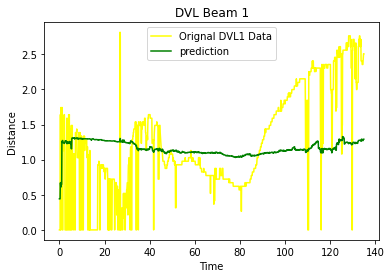

In [403]:
fax = plt.gca()
plt.plot(t_tes,Xzzf1, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t1, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

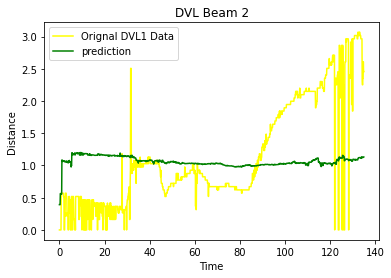

In [404]:
fax = plt.gca()
plt.plot(t_tes,Xzzf2, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t2, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

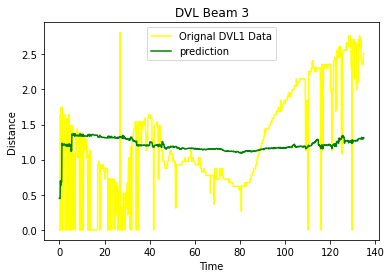

In [405]:
fax = plt.gca()
plt.plot(t_tes,Xzzf3, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t3, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

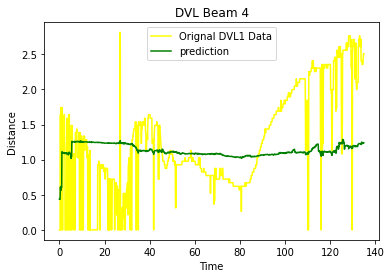

In [406]:
fax = plt.gca()
plt.plot(t_tes,Xzzf4, color='yellow', label='Orignal DVL1 Data')
plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [418]:
#https://drive.google.com/file/d/155Z2jFNWeMlGmOrK_vfV6CKM8fNEVC7S/view?usp=sharing
#https://drive.google.com/file/d/1AwsQ8sIzcuTXalR_A9q11k_EElRGQV2-/view?usp=sharing
#https://drive.google.com/file/d/1TZaUZx3hp94NswR6EgTLD10ZWFvz-LW2/view?usp=sharing
#test3
#https://drive.google.com/file/d/1i-DsoZEH_vIN9Lu2dTGgMvoqXPtEu5RM/view?usp=sharing
#https://drive.google.com/file/d/1TZaUZx3hp94NswR6EgTLD10ZWFvz-LW2/view?usp=sharing
#
#https://drive.google.com/file/d/1b1ywVL0jI15evpUIu2j9FPBhw8_cx-za/view?usp=sharing
#https://drive.google.com/file/d/1s9rWBRDVydbKnvwJbq3n-ziL2EsLJZHk/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/1tdTA2GAhtsnDdy-CT7uU8W0t3uKNlsUL/view?usp=sharing
#https://drive.google.com/file/d/19C5BWCndzY_W7mY2w1y1zAqjQLcyHwi4/view?usp=sharing
#https://drive.google.com/file/d/1u6do9VzYpdRrGQkoChgtnWv1KfuCRYED/view?usp=sharing
downloaded_16 = drive.CreateFile({'id':'/1TZaUZx3hp94NswR6EgTLD10ZWFvz-LW2'})

In [421]:
df3

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
1,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
2,0.1,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.000000
3,0.2,0.000000,0.000000,3.118769,0.620808,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.620808
4,0.3,0.000000,0.000000,1.487448,0.263957,0.00000,0.000000,0.00,0.000000,5.259879,2.000000,0.00000,0.263957
5,0.4,0.000000,1.997236,0.000000,2.812896,-19.17845,-14.900710,0.00,0.000000,5.157921,2.000000,0.00000,2.812896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33146,3314.5,1.742342,1.181575,1.334512,2.150172,-12.51371,0.481512,0.96,5.485570,2.914854,2.608981,2.25213,1.436469
33147,3314.6,1.742342,1.181575,0.000000,2.150172,-12.51371,0.481512,0.80,5.480334,2.914854,2.608981,2.25213,1.385490
33148,3314.7,1.742342,1.181575,0.161999,2.099193,-12.51371,0.481512,0.88,5.480334,2.914854,2.608981,2.25213,1.385490
33149,3314.8,1.742342,1.181575,0.212978,2.099193,-12.51371,0.481512,0.84,5.475098,2.914854,2.608981,2.25213,1.385490


In [423]:
x1= df3['DVL1_S']

In [422]:
x2= df3['DVL2_S']

In [424]:
x3= df3['DVL3_S']

In [439]:
p4= df3['DVL4_S']

In [442]:
x4= df3['North']

In [427]:
x5=df3['East']

In [428]:
x6=df3['Heading']

In [430]:
x7=df3['DVL1']

In [431]:
x8=df3['DVL2']

In [432]:
x9=df3['DVL3']

In [433]:
x10=df3['DVL4']

In [460]:
x11=df3['Down']

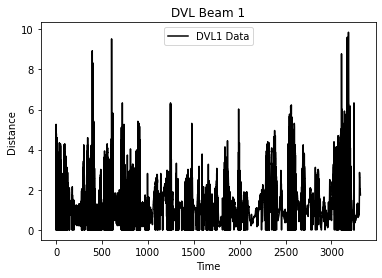

In [435]:
fax = plt.gca()
plt.plot(t,x1, color='Black', label='DVL1 Data')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 1')
plt.legend()

plt.show()

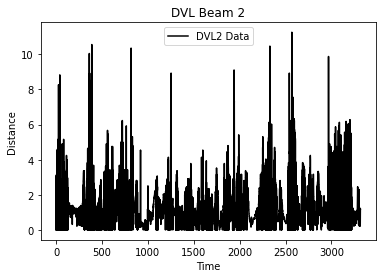

In [436]:
fax = plt.gca()
plt.plot(t,x2, color='Black', label='DVL2 Data')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 2')
plt.legend()

plt.show()

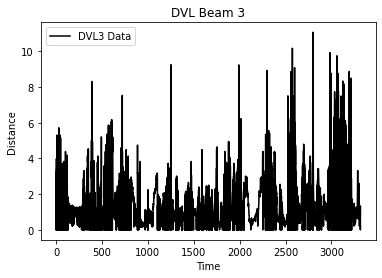

In [437]:
fax = plt.gca()
plt.plot(t,x3, color='Black', label='DVL3 Data')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 3')
plt.legend()

plt.show()

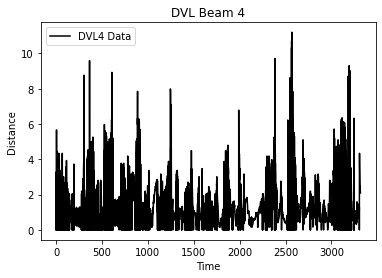

In [440]:
fax = plt.gca()
plt.plot(t,p4, color='Black', label='DVL4 Data')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('DVL Beam 4')
plt.legend()

plt.show()

In [441]:
df3.head()

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,North,East,Down,Heading,DVL1,DVL2,DVL3,DVL4
1,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.1,0.0,0.000000,0.000000,0.000000,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.2,0.0,0.000000,3.118769,0.620808,0.00000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.620808
4,0.3,0.0,0.000000,1.487448,0.263957,0.00000,0.00000,0.0,0.0,5.259879,2.0,0.0,0.263957
5,0.4,0.0,1.997236,0.000000,2.812896,-19.17845,-14.90071,0.0,0.0,5.157921,2.0,0.0,2.812896


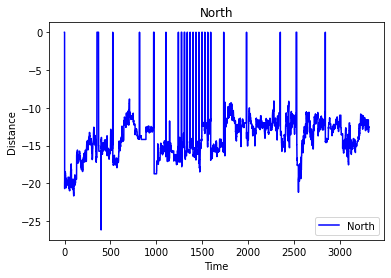

In [452]:
fax = plt.gca()
plt.plot(t,x4, color='Blue', label='North')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('North')
plt.legend()

plt.show()

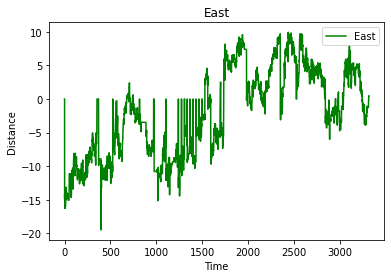

In [449]:
fax = plt.gca()
plt.plot(t,x5, color='Green', label='East')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('East')
plt.legend()

plt.show()

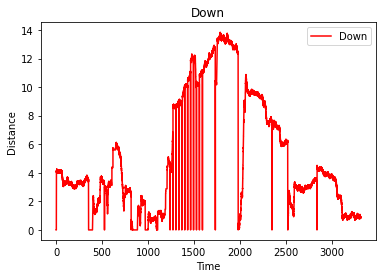

In [461]:
fax = plt.gca()
plt.plot(t,x11, color='red', label='Down')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Down')
plt.legend()

plt.show()

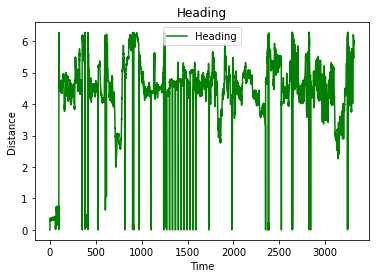

In [462]:
fax = plt.gca()
plt.plot(t,x6, color='green', label='Heading')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Heading')
plt.legend()

plt.show()

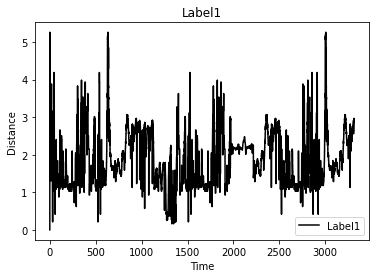

In [463]:
fax = plt.gca()
plt.plot(t,x7, color='Black', label='Label1')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Label1')
plt.legend()

plt.show()

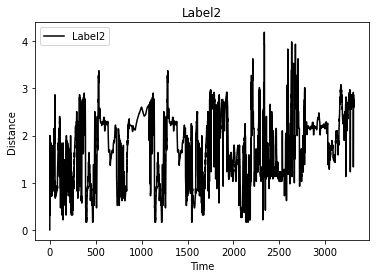

In [464]:
fax = plt.gca()
plt.plot(t,x8, color='Black', label='Label2')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Label2')
plt.legend()

plt.show()

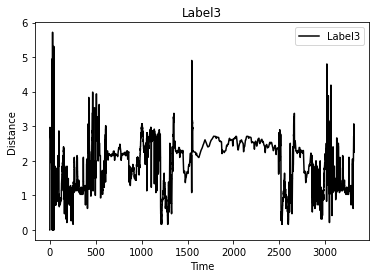

In [465]:
fax = plt.gca()
plt.plot(t,x9, color='Black', label='Label3')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Label3')
plt.legend()

plt.show()

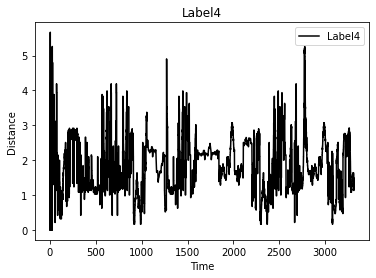

In [466]:
fax = plt.gca()
plt.plot(t,x10, color='Black', label='Label4')
#plt.plot(t_tes,t4, color='green', label='prediction')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.title('Label4')
plt.legend()

plt.show()